In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

In [2]:
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eaa7319fad544f224f5dfc098ae6a79


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

dhidhdhoo mv
isangel vu
lebu cl
requena pe
brigantine us
port hardy ca
vardo no
sakakah sa
rikitea pf
busselton au
busselton au
hobart au
attawapiskat ca
illoqqortoormiut gl
airai pw
asfi ma
kapaa us
tasiilaq gl
lebu cl
bethel us
listvyagi ru
kruisfontein za
tasiilaq gl
xining cn
nakhon thai th
bethel us
flinders au
mataura pf
barrow us
hilo us
mattru sl
doong ph
bondo cd
ushuaia ar
mount pleasant us
rikitea pf
sorland no
taolanaro mg
provideniya ru
punta arenas cl
hasaki jp
nushki pk
busselton au
victor harbor au
villazon bo
atuona pf
dikson ru
vaini to
port alfred za
longyearbyen sj
mangrol in
atuona pf
baykit ru
albany au
providencia mx
butaritari ki
charlottesville us
albany au
mwanza mw
banjar id
arraial do cabo br
bredasdorp za
barentsburg sj
barcelos br
lazaro cardenas mx
hobart au
sorong id
vila franca do campo pt
san patricio mx
bethel us
norman wells ca
palabuhanratu id
avarua ck
champerico gt
atuona pf
rikitea pf
te anau nz
rikitea pf
beloha mg
ushuaia ar
hami cn
pangnirtung

chuy uy
eyl so
dunedin nz
lompoc us
pangnirtung ca
cape town za
khatanga ru
vaini to
camana pe
rikitea pf
luganville vu
falun se
hobart au
bethanien na
yerofey pavlovich ru
rikitea pf
pisco pe
mataura pf
albany au
cape town za
mataura pf
kapaa us
atuona pf
sorland no
pisco pe
mahon es
taltal cl
wyndham nz
illoqqortoormiut gl
cumaribo co
punta arenas cl
barrow us
caucaia br
barrow us
khatanga ru
mahebourg mu
belushya guba ru
lompoc us
maumere id
arkhangelos gr
pochutla mx
cidreira br
chenghai cn
airai pw
sangar ru
severo-kurilsk ru
cidreira br
bathsheba bb
beckley us
rikitea pf
kurush ru
bokspits bw
aljezur pt
illoqqortoormiut gl
cape town za
qaanaaq gl
east london za
vaini to
ushuaia ar
grindavik is
talnakh ru
ilulissat gl
sitka us
mataura pf
mar del plata ar
patacamaya bo
kariba zw
sindor ru
barentsburg sj
byron bay au
axim gh
port hedland au
mar del plata ar
ushuaia ar
ushuaia ar
rikitea pf
cherskiy ru
lewistown us
axim gh
albany au
port elizabeth za
cape town za
kapaa us
albany au
f

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# 1. reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dhidhdhoo
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | requena
Processing Record 5 of Set 1 | brigantine
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | sakakah
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | asfi
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | listvyagi
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | xining
Processing Record 22 of Set 1 | nakh

Processing Record 39 of Set 4 | uzhur
Processing Record 40 of Set 4 | glazov
Processing Record 41 of Set 4 | elizabeth city
Processing Record 42 of Set 4 | ust-kuyga
Processing Record 43 of Set 4 | sataua
City not found. Skipping...
Processing Record 44 of Set 4 | mahon
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | ibotirama
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 1 of Set 5 | severodvinsk
Processing Record 2 of Set 5 | lishui
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | athabasca
Processing Record 5 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 6 of Set 5 | tungor
Processing Record 7 of Set 5 | cuamba
Processing Record 8 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 

Processing Record 29 of Set 8 | arkhangelos
City not found. Skipping...
Processing Record 30 of Set 8 | pochutla
Processing Record 31 of Set 8 | chenghai
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | beckley
Processing Record 34 of Set 8 | kurush
Processing Record 35 of Set 8 | bokspits
City not found. Skipping...
Processing Record 36 of Set 8 | aljezur
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | sitka
Processing Record 39 of Set 8 | patacamaya
Processing Record 40 of Set 8 | kariba
Processing Record 41 of Set 8 | sindor
Processing Record 42 of Set 8 | byron bay
Processing Record 43 of Set 8 | axim
Processing Record 44 of Set 8 | cherskiy
Processing Record 45 of Set 8 | lewistown
Processing Record 46 of Set 8 | fez
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8 | tahe
Processing Record 49 of Set 8 | marsa matruh
Processing Record 50 of Set 8 | kapit
Processing Record 1 of Set 9 | port moresby
Processing Record

Processing Record 13 of Set 12 | mayfield
Processing Record 14 of Set 12 | kabalo
Processing Record 15 of Set 12 | nova borova
Processing Record 16 of Set 12 | buta
Processing Record 17 of Set 12 | togur
Processing Record 18 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 19 of Set 12 | port-cartier
Processing Record 20 of Set 12 | ojinaga
Processing Record 21 of Set 12 | san jose
Processing Record 22 of Set 12 | kamenka
Processing Record 23 of Set 12 | vaitape
Processing Record 24 of Set 12 | iralaya
Processing Record 25 of Set 12 | ormara
Processing Record 26 of Set 12 | uk
City not found. Skipping...
Processing Record 27 of Set 12 | hanzhong
Processing Record 28 of Set 12 | batagay
Processing Record 29 of Set 12 | den helder
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | henties bay
Processing Record 32 of Set 12 | zhanaozen
Processing Record 33 of Set 12 | ostrovnoy
Processing Record 34 of Set 12 | neringa
Processing Record 35 of Set 1

In [15]:
len(city_data)

566

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dhidhdhoo,6.88,73.10,85.98,63,87,6.46,MV,2020-04-16 04:05:27
1,Isangel,-19.55,169.27,84.20,79,75,14.50,VU,2020-04-16 04:09:36
2,Lebu,-37.62,-73.65,54.32,84,76,8.39,CL,2020-04-16 04:09:37
3,Requena,39.49,-1.10,55.40,100,40,5.82,ES,2020-04-16 04:09:37
4,Brigantine,39.41,-74.36,48.00,42,1,5.82,US,2020-04-16 04:09:37
5,Port Hardy,50.70,-127.42,53.60,76,75,4.70,CA,2020-04-16 04:09:38
6,Vardo,70.37,31.11,30.20,80,100,6.93,NO,2020-04-16 04:09:38
7,Sakakah,29.97,40.21,57.20,76,23,6.93,SA,2020-04-16 04:09:38
8,Rikitea,-23.12,-134.97,77.88,74,100,8.99,PF,2020-04-16 04:09:38
9,Busselton,-33.65,115.33,72.00,33,36,3.36,AU,2020-04-16 04:09:39


In [18]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dhidhdhoo,MV,2020-04-16 04:05:27,6.88,73.10,85.98,63,87,6.46
1,Isangel,VU,2020-04-16 04:09:36,-19.55,169.27,84.20,79,75,14.50
2,Lebu,CL,2020-04-16 04:09:37,-37.62,-73.65,54.32,84,76,8.39
3,Requena,ES,2020-04-16 04:09:37,39.49,-1.10,55.40,100,40,5.82
4,Brigantine,US,2020-04-16 04:09:37,39.41,-74.36,48.00,42,1,5.82
...,...,...,...,...,...,...,...,...,...
561,Macae,BR,2020-04-16 04:11:24,-22.37,-41.79,72.55,91,100,5.19
562,Jijiga,ET,2020-04-16 04:12:02,9.35,42.80,64.56,53,8,3.53
563,Zeya,RU,2020-04-16 04:12:02,53.75,127.27,52.70,38,0,4.07
564,Vuktyl,RU,2020-04-16 04:12:02,63.86,57.31,35.87,81,2,17.13


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time

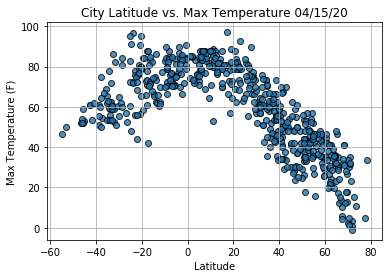

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

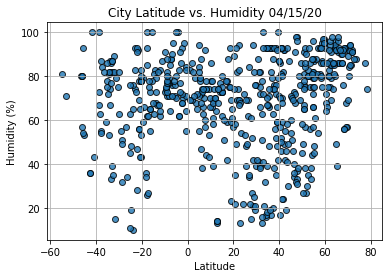

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

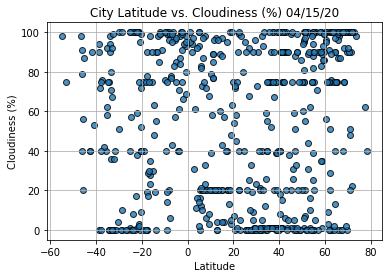

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

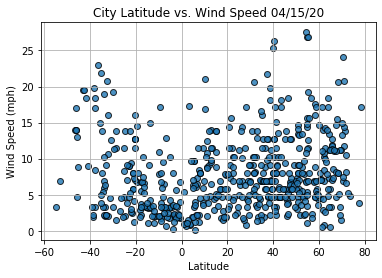

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()